In [49]:
import numpy as np
import os

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import chisquare

In [50]:
DATA_DIR = "../data/"
SHI_PRF_FILE = "prfs/shi_prfs.parqet"
MODELLED_PRF_FILE = "prfs/modelled.parquet"
t_min, t_max = -2, 14

In [51]:
shi_prfs = pd.read_parquet(os.path.join(DATA_DIR, SHI_PRF_FILE))
model_prfs = pd.read_parquet(os.path.join(DATA_DIR, MODELLED_PRF_FILE))
model_prfs = model_prfs.loc[t_min:t_max]
events = [e for e in shi_prfs.columns if e in model_prfs.columns]

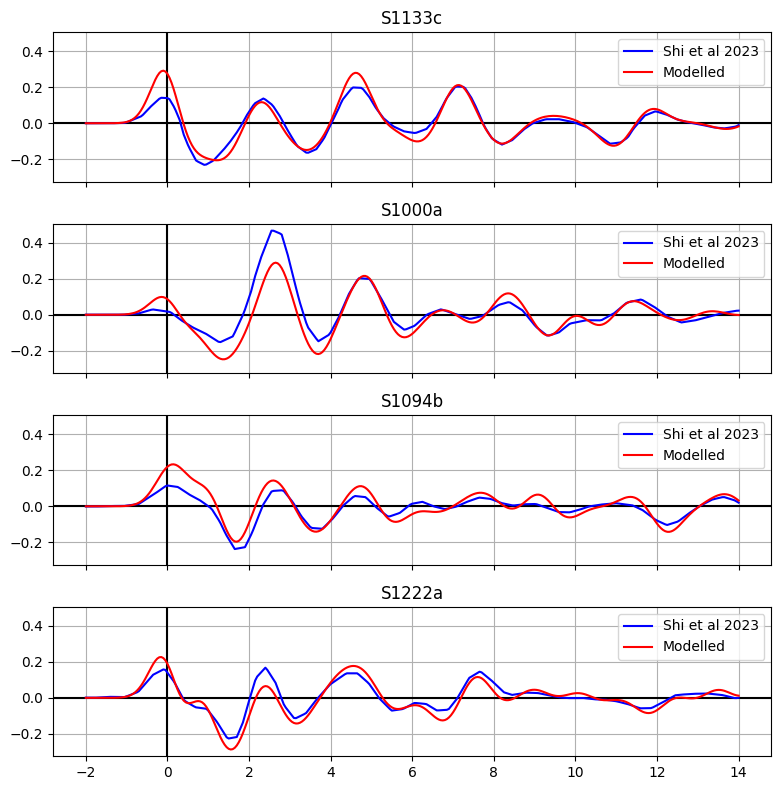

In [52]:
fig, axs = plt.subplots(nrows=len(events), ncols=1, figsize=(8, 2 * len(events)), sharex=True, sharey=True)
for i, event in enumerate(events):
    # chi_sq = chisquare(model_prfs[event], shi_prfs[event])
    ax = axs[i]
    ax.grid()
    ax.axhline(0, color="black")
    ax.axvline(0, color="black")
    ax.plot(shi_prfs.index, shi_prfs[event], color="blue", label="Shi et al 2023")
    ax.plot(model_prfs.index, model_prfs[event], color="red", label="Modelled")
    ax.set_title(event)
    ax.legend()
fig.tight_layout()

In [56]:
for event in events:
    print(np.corrcoef(shi_prfs[event], model_prfs[event])[0,1] ** 2)

0.9082935845154806
0.7606202911522687
0.7804259940039419
0.8737621717270022
